In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

# load csv file
data = pd.read_csv("data/airline_correlation2.csv")

In [16]:
# lista con el nombre de las columnas
columnas = data.columns


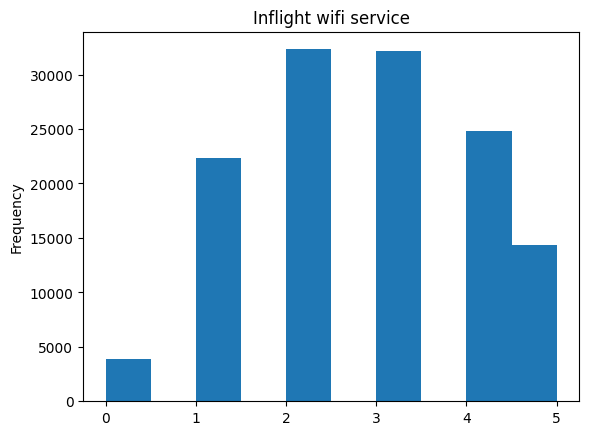

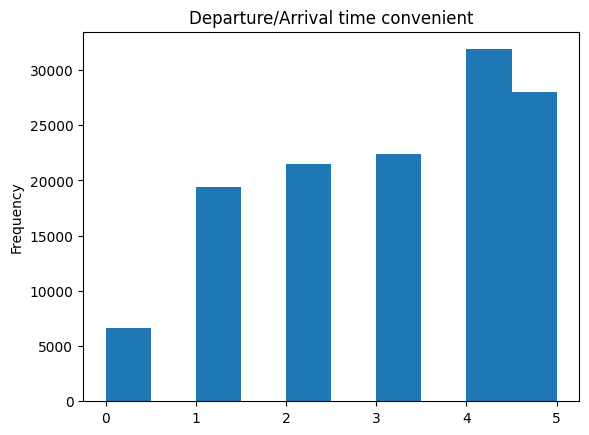

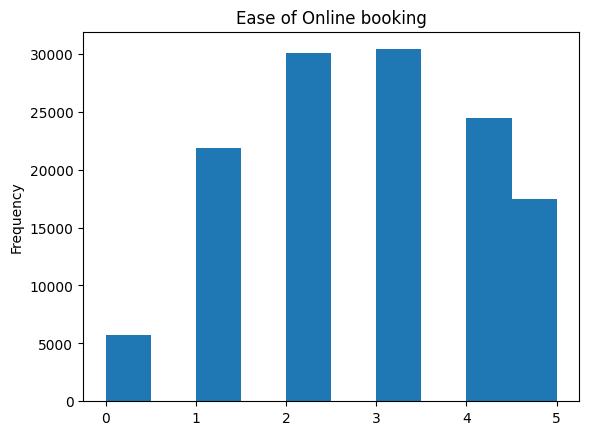

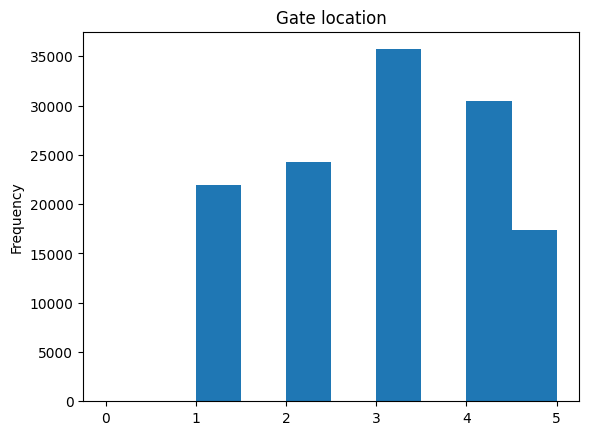

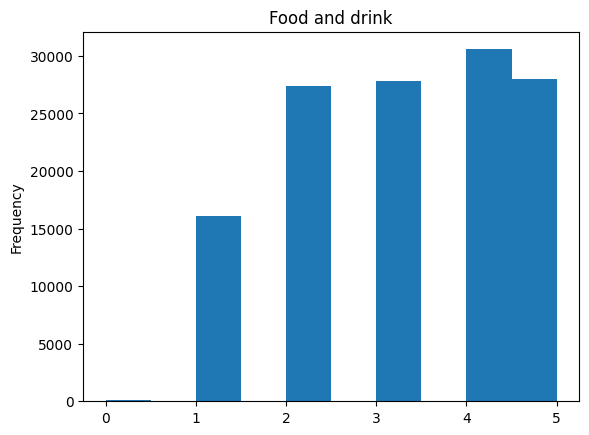

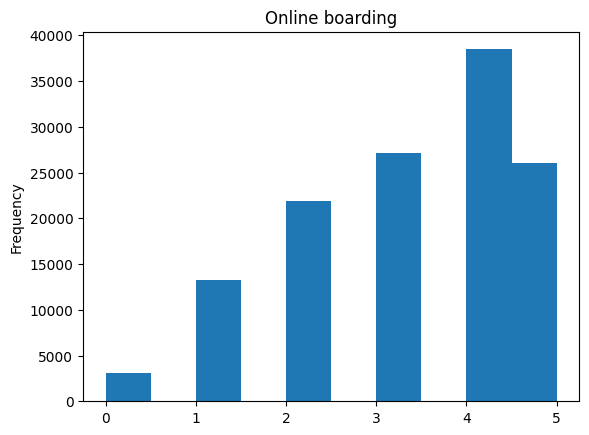

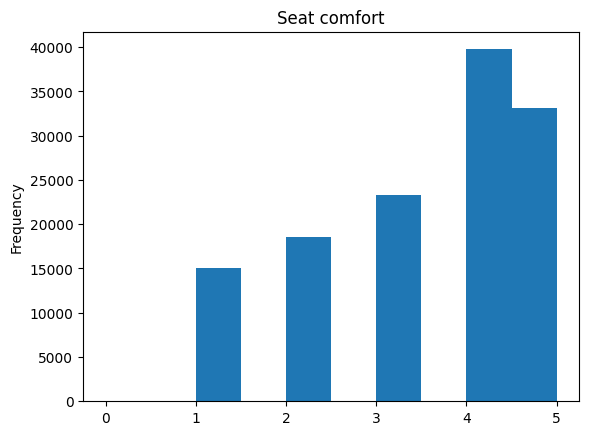

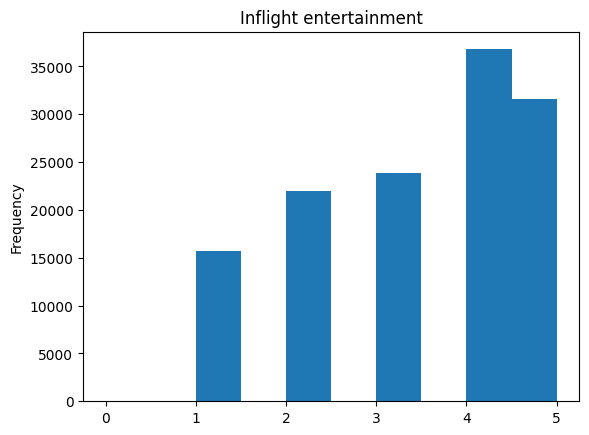

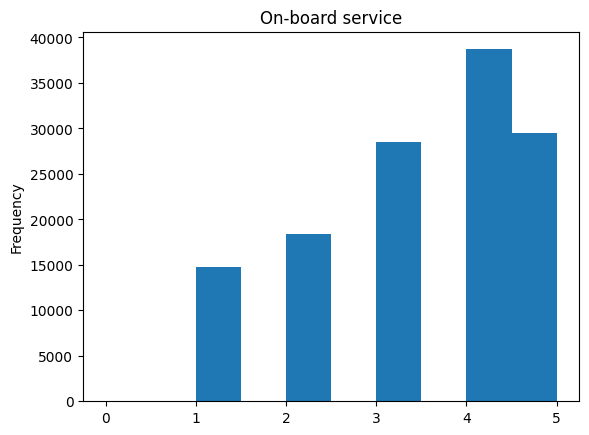

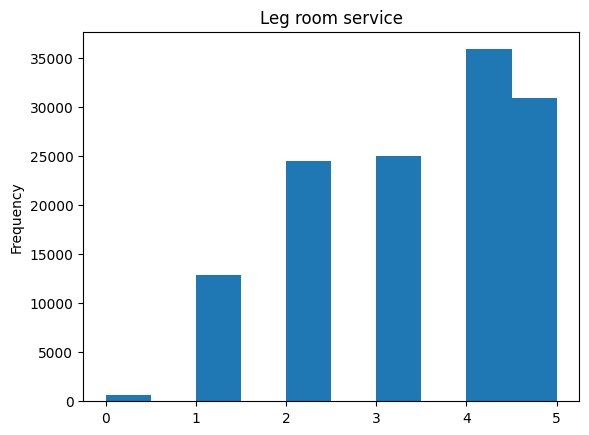

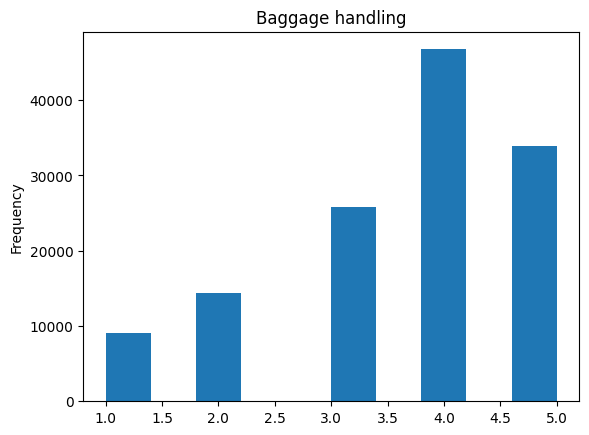

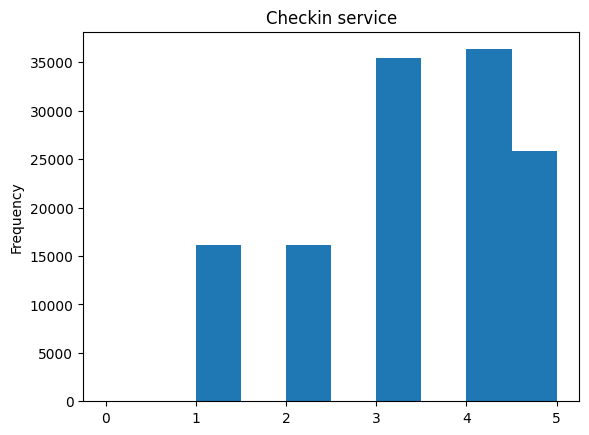

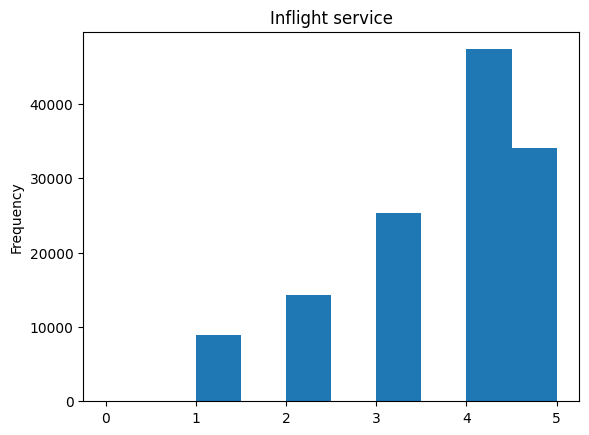

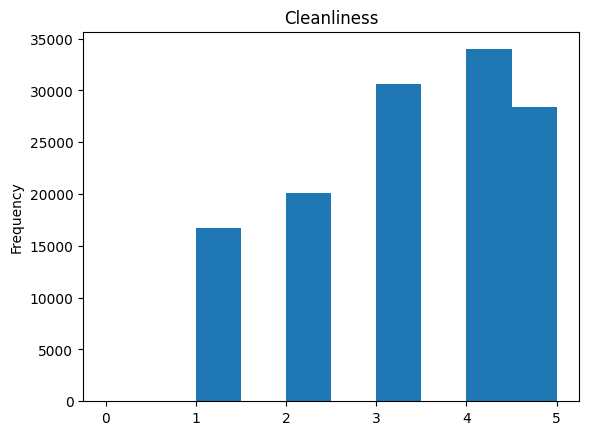

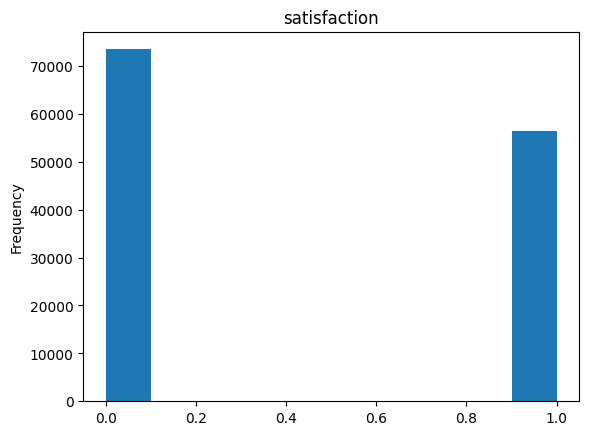

In [17]:
# Graficos de barras para las columnas de columnas utilizando seaborn
for columna in columnas:
    data[columna].plot(kind='hist', title=columna)
    plt.show()

# Distribucion de los datos

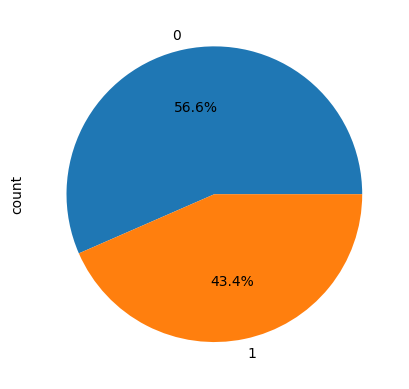

In [18]:
#grafico de torta para la columna 'satisfaction'
data['satisfaction'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

# Evaluacion de normalidad

In [19]:
from scipy.stats import shapiro

# Eliminación de la columna 'Satisfaction' para verificar la normalidad de las columnas
columnas_org = data.columns
columnas_org = columnas.drop('satisfaction')


# Verificación de Normalidad con Shapiro-Wilk Test Para el conjunto de datos original
for question in columnas_org:
    stat, p_value = shapiro(data[question])
    print(f'{question} - p-value: {p_value} - Normal' if p_value > 0.05 else f'{question} - p-value: {p_value} - Not Normal')


Inflight wifi service - p-value: 1.602137328129764e-107 - Not Normal
Departure/Arrival time convenient - p-value: 1.5678267683575064e-116 - Not Normal
Ease of Online booking - p-value: 1.0388949891199321e-107 - Not Normal
Gate location - p-value: 1.5237839546973062e-115 - Not Normal
Food and drink - p-value: 5.519836241709028e-118 - Not Normal
Online boarding - p-value: 9.567038565455547e-116 - Not Normal
Seat comfort - p-value: 4.982398319521897e-124 - Not Normal
Inflight entertainment - p-value: 5.543266939409988e-122 - Not Normal
On-board service - p-value: 8.065615507042758e-121 - Not Normal
Leg room service - p-value: 4.3950566311488646e-119 - Not Normal
Baggage handling - p-value: 3.4686861458283286e-125 - Not Normal
Checkin service - p-value: 6.997004283236605e-119 - Not Normal
Inflight service - p-value: 1.5749867245871614e-125 - Not Normal
Cleanliness - p-value: 3.4925022647946356e-119 - Not Normal


d:\Mineria de datos\datamining-IN\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 129880.
  res = hypotest_fun_out(*samples, **kwds)


In [20]:
import scipy.stats as stats

columnas_org = data.columns
columnas_org = columnas.drop('satisfaction')

# Prueba de Kolmogorov-Smirnov
for question in columnas_org:
    ks_stat, ks_p_value = stats.kstest(data[question], 'norm')
    print(f'{question} - p-value: {ks_p_value} - Normal' if p_value > 0.05 else f'{question} - p-value: {ks_p_value} - Not Normal')

Inflight wifi service - p-value: 0.0 - Not Normal
Departure/Arrival time convenient - p-value: 0.0 - Not Normal
Ease of Online booking - p-value: 0.0 - Not Normal
Gate location - p-value: 0.0 - Not Normal
Food and drink - p-value: 0.0 - Not Normal
Online boarding - p-value: 0.0 - Not Normal
Seat comfort - p-value: 0.0 - Not Normal
Inflight entertainment - p-value: 0.0 - Not Normal
On-board service - p-value: 0.0 - Not Normal
Leg room service - p-value: 0.0 - Not Normal
Baggage handling - p-value: 0.0 - Not Normal
Checkin service - p-value: 0.0 - Not Normal
Inflight service - p-value: 0.0 - Not Normal
Cleanliness - p-value: 0.0 - Not Normal


# Calculo de las correlaciones

In [21]:
from scipy.stats import spearmanr, pointbiserialr

# Inicializar diccionarios para almacenar los resultados
spearman_results = {}
biserial_results = {}

# Calcular coeficiente de correlación de Spearman
for question in data.columns[:-1]: # Excluir la columna 'satisfaction'
    corr, p_value = spearmanr(data[question], data['satisfaction'])
    spearman_results[question] = {'correlation': corr, 'p-value': p_value}

# Calcular coeficiente de correlación de Punto Biserial
for question in data.columns[:-1]:
    corr, p_value = pointbiserialr(data[question], data['satisfaction'])
    biserial_results[question] = {'correlation': corr, 'p-value': p_value}

# Convertir resultados a DataFrames para facilitar la salida en KNIME
spearman_df = pd.DataFrame.from_dict(spearman_results, orient='index')
biserial_df = pd.DataFrame.from_dict(biserial_results, orient='index')

# Preparar la salida del script para KNIME
# Concatenar los DataFrames para una salida única (opcional)
result_df = spearman_df.join(biserial_df, lsuffix='_spearman', rsuffix='_biserial')


In [22]:
result_df

,correlation_spearman,p-value_spearman,correlation_biserial,p-value_biserial
Inflight wifi service,0.286819,0.000000e+00,0.283460,0.000000e+00
Departure/Arrival time convenient,-0.052131,7.526396e-79,-0.054270,2.657334e-85
Ease of Online booking,0.174437,0.000000e+00,0.168877,0.000000e+00
Gate location,-0.003487,2.089172e-01,-0.002793,3.140997e-01
Food and drink,0.208503,0.000000e+00,0.211340,0.000000e+00
Online boarding,0.549520,0.000000e+00,0.501749,0.000000e+00
Seat comfort,0.361519,0.000000e+00,0.348829,0.000000e+00
Inflight entertainment,0.399734,0.000000e+00,0.398234,0.000000e+00
On-board service,0.328396,0.000000e+00,0.322205,0.000000e+00
Leg room service,0.317357,0.000000e+00,0.312424,0.000000e+00


# Chi-Cuadrado

In [23]:
from scipy.stats import chi2_contingency

# Supongamos que df es tu DataFrame
# 'Satisfaction' es tu variable objetivo (binaria: 'Satisfactory' o 'Unsatisfactory')

# Puedes iterar sobre todas las columnas de interés
for column in data.columns[:-1]:  # Excluye la columna de satisfacción si es la última
    contingency_table = pd.crosstab(data[column], data['satisfaction'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{column}: Chi2 = {chi2}, p-value = {p}")


Inflight wifi service: Chi2 = 35891.43336967039, p-value = 0.0
Departure/Arrival time convenient: Chi2 = 601.462958170054, p-value = 9.767302052551637e-128
Ease of Online booking: Chi2 = 12846.702394615426, p-value = 0.0
Gate location: Chi2 = 3069.907991724218, p-value = 0.0
Food and drink: Chi2 = 6571.202895062374, p-value = 0.0
Online boarding: Chi2 = 49531.21839635691, p-value = 0.0
Seat comfort: Chi2 = 19538.740376260714, p-value = 0.0
Inflight entertainment: Chi2 = 23071.602435454988, p-value = 0.0
On-board service: Chi2 = 14342.659690425951, p-value = 0.0
Leg room service: Chi2 = 15200.778756074234, p-value = 0.0
Baggage handling: Chi2 = 10820.213522965987, p-value = 0.0
Checkin service: Chi2 = 8143.77321636242, p-value = 0.0
Inflight service: Chi2 = 10357.930495326505, p-value = 0.0
Cleanliness: Chi2 = 12948.918125498116, p-value = 0.0


# Mann-whitney U

In [24]:
from scipy.stats import mannwhitneyu

# Función para realizar la prueba de Mann-Whitney U
def mann_whitney_test(df, column, target):
    group1 = df[df[target] == 1][column]
    group2 = df[df[target] == 0][column]
    stat, p = mannwhitneyu(group1, group2)
    return stat, p

# Lista de preguntas
questions = [
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness'
]

# Realizar la prueba de Mann-Whitney U para cada pregunta
results = {}
for question in questions:
    stat, p = mann_whitney_test(data, question, 'satisfaction')
    results[question] = {'stat': stat, 'p-value': p}

# Mostrar los resultados
for question, result in results.items():
    print(f"{question}: U = {result['stat']}, p-value = {result['p-value']}")

Inflight wifi service: U = 2749286084.5, p-value = 0.0
Departure/Arrival time convenient: U = 1948950969.0, p-value = 9.557234728339396e-79
Ease of Online booking: U = 2485106900.5, p-value = 0.0
Gate location: U = 2064160977.5, p-value = 0.20891597425900144
Food and drink: U = 2564446530.5, p-value = 0.0
Online boarding: U = 3365885825.5, p-value = 0.0
Seat comfort: U = 2920407181.0, p-value = 0.0
Inflight entertainment: U = 3012884497.5, p-value = 0.0
On-board service: U = 2843731219.0, p-value = 0.0
Leg room service: U = 2819221367.5, p-value = 0.0
Baggage handling: U = 2700852752.5, p-value = 0.0
Checkin service: U = 2620790425.5, p-value = 0.0
Inflight service: U = 2688793240.0, p-value = 0.0
Cleanliness: U = 2791731973.0, p-value = 0.0
